In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import csv

In [2]:
path='/Users/bengieru/MLN/data/Johan_Clean_Traces_Features_and_Spikes/'

trace=open( path +"/m_1_session_1_baseline_trace.csv", "r")
spike=open( path +"/m_1_session_1_baseline_spikes_complexity.csv", "r")
reader_trace = csv.reader(trace)
reader_spike = csv.reader(spike)
traces=np.zeros((94,8000)) # roi x time
spikes=np.zeros((94,8000)) # roi x time
#row_count = sum(1 for row in reader)
for i,line in enumerate(reader_trace):
    for j in range(len(line)):
        traces[i][j]=line[j]
for i,line in enumerate(reader_spike):
    for j in range(len(line)):
        spikes[i][j]=line[j]

## mess with sigma to find the optimal standard deviation. sigma =1 is gaussian kernel with length 9, sigma =0.5 is gaussian kernel with length 5, sigma=0.25 is a gaussian kernel with length 3.

Text(0.5, 1.0, 'gaussian filter with stand. dev. 1.200000 applied to spike complexity for neuron 42')

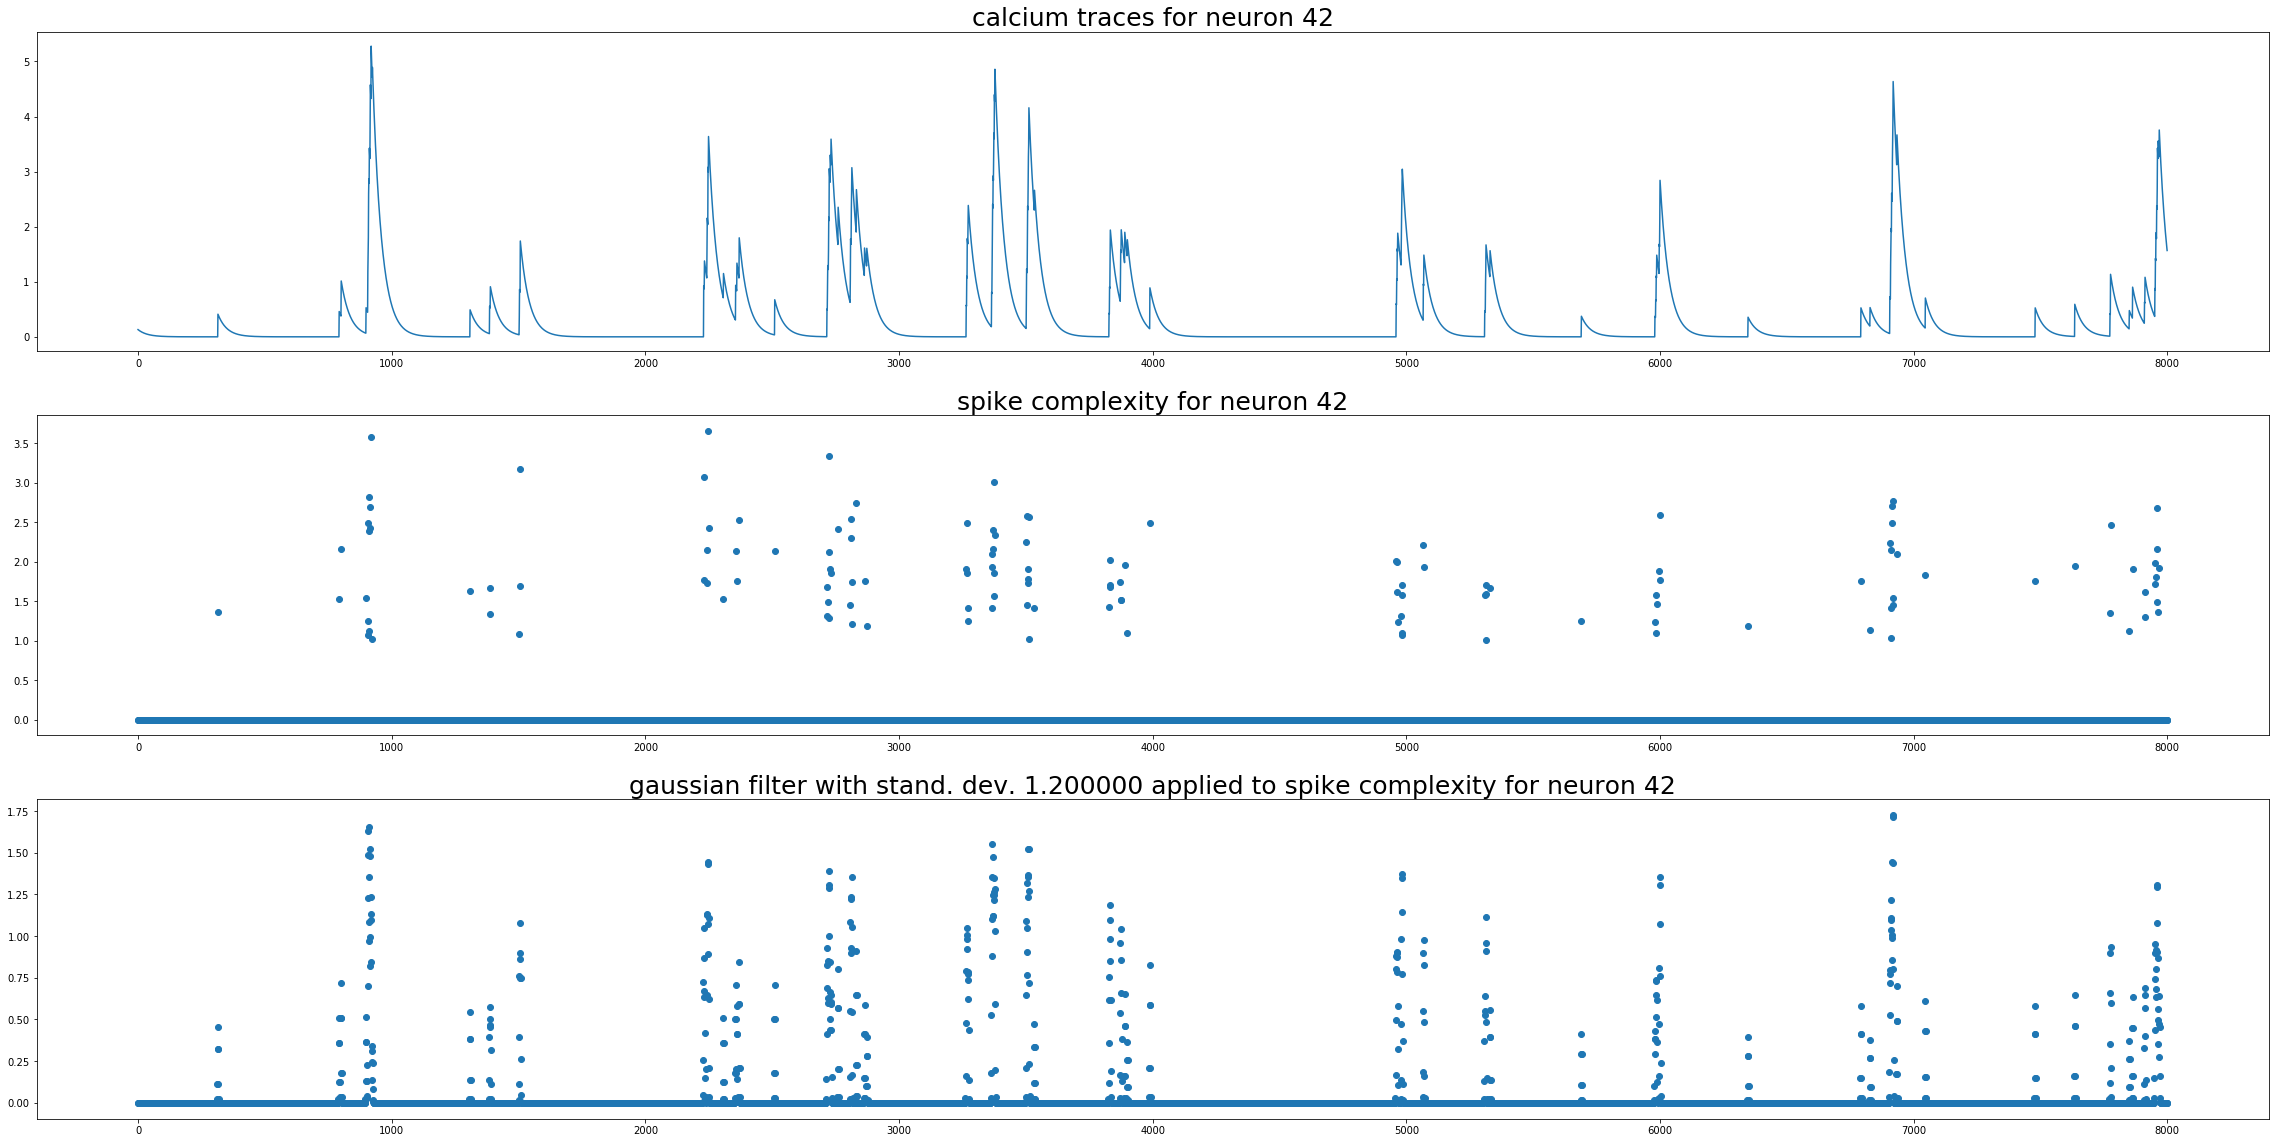

In [10]:
neuron = 42
sigma = 1.2
fig,ax = plt.subplots(3,1,figsize=(40,20))
y = np.arange(8000)
ax[0].plot(traces[neuron],label='traces')
ax[1].scatter(y,spikes[neuron], label='spike_max')
ax[2].scatter(y,gaussian_filter1d(spikes[neuron], sigma))
#ax.plot(spikes[0],label='spikes')
ax[0].set_title('calcium traces for neuron %d'%neuron, fontsize=25)
ax[1].set_title('spike complexity for neuron %d'%neuron,fontsize=25)
ax[2].set_title('gaussian filter with stand. dev. %2f applied to spike complexity for neuron %d'%(sigma,neuron),fontsize=25)

In [4]:
binned_spikes = []
for i in range(len(spikes)):
    binned_spikes.append(spikes[i].reshape(500,16))
binned_spikes=np.array(binned_spikes)

In [17]:
A = np.array([0,1,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0])
kernel = np.array([0.2,1,0.2])
#np.nonzero(gaussian_filter1d(spikes[42],0.25))
gaussian_filter1d(spikes[42],1.2)[300:330]
#gaussian_filter1d(spikes[42],1)[gaussian_filter1d(spikes[42],1)>0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.73359484e-05, 1.76015807e-03,
       2.00045385e-02, 1.13530359e-01, 3.21737808e-01, 4.55301198e-01,
       3.21737808e-01, 1.13530359e-01, 2.00045385e-02, 1.76015807e-03,
       7.73359484e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [13]:
spikes[42][315]

1.369521597685681